In [1]:
using Distributions
using DataFrames
using CornerPlot
using Compose

### Example 1 - Gaussian Mixture

In [2]:
# create samples
μ₁ = [0.0, 0.0, 0.0]
μ₂ = [1.0, 2.0, 0.0]
Σ₁ = [1.0 0.5 -0.1; 0.5 1.0 0.0; -0.1 0.0 1.0]
Σ₂ = [1.0 -0.5 0.0; -0.5 1.0 0.0; 0.0 0.0 1.0]

X1 = rand(MvNormal(Σ₁), 10000)
X2 = μ₂ .+ 0.5 * rand(MvNormal(Σ₂), 5000)

X = hcat(X1,X2)

# give each dimension a name
dimnames = ["ξᵣ", "β", "Q"]

# create the array of "true means" to pass corner
truemeans = [[μ₁[i], μ₂[i]] for i in 1:3]

3-element Array{Array{Float64,1},1}:
 [0.0, 1.0]
 [0.0, 2.0]
 [0.0, 0.0]

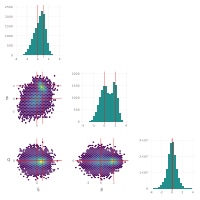

In [3]:
# transpose X so that each column represents one dimension
corner(X', varnames=dimnames, truthvals=truemeans)

### Example 2 - Rosenbrock Samples

In [4]:
# let's sample a banana using the Rosenbrock function
# here is the 2D version
function rosenbrock(x, args)
    a, b = args
    (a - x[1])^2 + b * (x[2] - x[1]^2)^2
end

# for the example, set a = 1 and b = 100
rosenbrock(x) = - rosenbrock(x, (1, 100))

rosenbrock (generic function with 2 methods)

In [5]:
# generate samples from this density using an MCMC sampler
using AffineInvariantMCMC

In [6]:
# make a simple starting guess for the samples
numdims = 2
numwalkers = 50
burnin = 10
numsamples_perwalker = 80
thinning = 5
x0 = -1.0 + 2 * rand(numdims, numwalkers)

# now run the sampler
chain, likevals = AffineInvariantMCMC.sample(rosenbrock, numwalkers, x0, burnin, 1)
chain, likevals = AffineInvariantMCMC.sample(rosenbrock, numwalkers, chain[:, :, end],
                                             numsamples_perwalker, thinning)

([0.0505609 0.296745 … -0.0746082 0.438662; -0.02384 0.132124 … -0.170194 0.160619]

[0.0262409 0.437173 … -0.192798 0.363845; -0.0350293 0.134547 … -0.0747933 0.146962]

[0.0262409 0.41149 … -0.00620123 0.409523; -0.0350293 0.0962122 … -0.0333564 0.12992]

...

[0.818044 1.1685 … -0.390365 0.322674; 0.731785 1.29249 … 0.182713 0.191428]

[0.798454 1.02293 … -0.579295 0.178035; 0.71332 1.13648 … 0.278036 0.0940777]

[0.917231 1.20771 … -0.166474 0.189878; 0.854019 1.52158 … 0.160405 0.0957443], [-0.971111 -1.07578 … -0.615038 -0.022994; -0.688753 -0.636829 … -0.812355 -0.440186; … ; -4.24397 -2.67636 … -2.82534 -3.12136; -0.416257 -0.425947 … -1.06477 -1.0126])

In [7]:
# We can also make cornerplots with dataframes
df = DataFrame()

# flatten the chain and add to the dataframe
flatchain, flatlikevals = AffineInvariantMCMC.flattenmcmcarray(chain, likevals)
df[:x] = flatchain[1, :]
df[:y] = flatchain[2, :]

800-element Array{Float64,1}:
 -0.02384   
  0.132124  
  0.00391041
  1.47559   
 -0.0665709 
  0.148305  
  0.098489  
 -0.539278  
  0.187036  
  0.154422  
  0.0818287 
 -0.0603322 
  0.0834488 
  ⋮         
 -0.0900929 
 -0.0711256 
 -0.0120034 
 -0.0142948 
  0.20088   
  0.055504  
  0.348835  
  0.517106  
 -0.0643786 
  2.7593    
  0.160405  
  0.0957443 

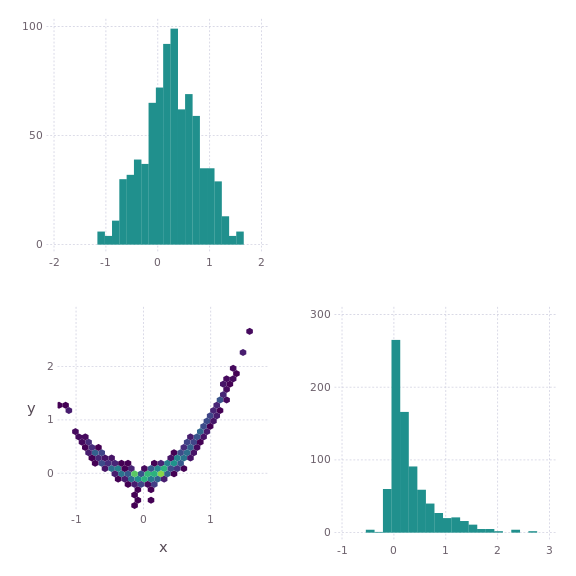

In [8]:
# and plot the samples with the cornerplot, specifying which columns we want
fig = corner(df, varnames = [:x, :y])

draw(PNG("../assets/rosenbrock.png", 6inch, 6inch), fig)
display("image/png", read("../assets/rosenbrock.png"))